In [111]:
#导入筛选和清洁后的数据
import numpy as np
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
from matplotlib import pyplot as plt
data = pd.read_csv("C:\\Users\\李乔乔\\Desktop\\华数杯数学建模\\data_xuni.csv",engine='python')

data1=data[data["i"]==1]
data1
data2=data[data["i"]==2]
data2
data3=data[data["i"]==3]
data3
columns_size = data3.columns.size
data3.iloc[:,2:columns_size-1]

,a1,a2,a3,a4,a5,a6,a7,a8,B2,B4,...,b12_1,b12_2,b12_3,b12_4,b12_5,b12_6,b12_7,b12_8,b12_9,b12_10
1,88.92,90.18,88.92,88.88,88.87,88.88,90.98,88.87,20,3,...,0,0,0,1,0,0,0,0,0,0
2,67.26,67.10,66.69,70.34,69.73,69.74,73.52,66.66,32,8,...,0,1,0,0,0,0,0,0,0,0
3,93.53,90.94,73.90,88.88,90.65,94.17,95.60,96.65,34,5,...,0,0,0,0,0,0,1,0,0,0
4,89.65,93.95,73.90,96.30,88.87,96.92,95.60,95.88,36,5,...,0,1,0,0,0,0,0,0,0,0
5,75.53,81.09,62.94,77.77,66.65,74.70,77.77,77.76,15,6,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,83.52,75.93,74.05,85.61,63.64,88.68,84.31,77.34,27,3,...,0,0,0,0,0,0,0,1,0,0
1693,89.65,78.56,74.05,89.30,70.21,89.21,84.31,81.02,32,12,...,0,1,0,0,0,0,0,0,0,0
1694,79.84,71.79,77.81,78.66,77.60,74.70,77.77,74.44,8,3,...,0,0,0,0,0,0,1,0,0,0
1695,72.28,63.69,74.05,74.03,63.58,66.99,68.95,59.23,10,3,...,0,0,0,0,0,0,1,0,0,0


In [112]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

# 20%用于测试集，80%用于训练集
train,test= train_test_split(data,test_size=0.20,random_state=10)
def get_y_train():
    y_train = np.array(train['willing'])
   
    return y_train
 
def get_y_test():
    y_test = np.array(test['willing'])
 
    return y_test
 
def get_X_train():
   # oh_data = pd.get_dummies(train) #对非数值数据进行ont-hot编码
   #y_train = np.where(y_train == '1', 1, 0) #将预测值转换成01
    columns_size = train.columns.size
    X_train = train.iloc[:,2:columns_size-1] #取特征
    X_train = preprocessing.scale(X_train) #归一化
    return X_train
 
def get_X_test():
    #oh_test = pd.get_dummies(test) #对非数值数据进行ont-hot编码
    # y_train = np.where(y_test == '1', 1, 0) #将预测值转换成01
    columns_size = test.columns.size
    X_test = test.iloc[:,2:columns_size-1] #取特征
    X_test= preprocessing.scale(X_test) #归一化
    return X_test
X_test = get_X_test()
X_train = get_X_train()
y_test = get_y_test()
y_train = get_y_train()


In [113]:
print('X_test.shape:'+str(X_test.shape))
print('X_train.shape:'+str(X_train.shape))
oh_data =pd.DataFrame( pd.get_dummies(train) )
oh_data.columns

X_test.shape:(393, 55)
X_train.shape:(1571, 55)


Index(['n', 'i', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'B2', 'B4',
       'B5', 'B7', 'B8', 'B10', 'B13', 'B14', 'B15', 'B16', 'B17', 'b1_1',
       'b1_2', 'b3_1', 'b3_2', 'b3_3', 'b3_4', 'b3_5', 'b6_1', 'b6_2', 'b6_3',
       'b6_4', 'b6_5', 'b6_6', 'b6_7', 'b9_1', 'b9_2', 'b9_3', 'b9_4', 'b11_1',
       'b11_2', 'b11_3', 'b11_4', 'b11_5', 'b11_6', 'b11_7', 'b11_8', 'b12_1',
       'b12_2', 'b12_3', 'b12_4', 'b12_5', 'b12_6', 'b12_7', 'b12_8', 'b12_9',
       'b12_10', 'willing'],
      dtype='object')

In [114]:
from keras.layers import Dense,LSTM,Dropout
from keras.models import Sequential
from keras import optimizers
from sklearn import metrics
 
 
model = Sequential()
model.add(Dense(55, input_dim = 55, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = optimizers.Adam(lr = 0.001),loss = 'binary_crossentropy',metrics = ['accuracy'])

history = model.fit(X_train, y_train,epochs = 25,  batch_size = 50, validation_data = (X_test, y_test))

C:\shazi\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/25
32/32 [==============================] - 1s 12ms/step - loss: 0.4618 - accuracy: 0.7867 - val_loss: 0.1718 - val_accuracy: 0.9644
Epoch 2/25
32/32 [==============================] - 0s 2ms/step - loss: 0.2402 - accuracy: 0.9375 - val_loss: 0.1649 - val_accuracy: 0.9644
Epoch 3/25
32/32 [==============================] - 0s 2ms/step - loss: 0.2249 - accuracy: 0.9340 - val_loss: 0.1521 - val_accuracy: 0.9644
Epoch 4/25
32/32 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy: 0.9449 - val_loss: 0.1459 - val_accuracy: 0.9644
Epoch 5/25
32/32 [==============================] - 0s 2ms/step - loss: 0.1673 - accuracy: 0.9475 - val_loss: 0.1444 - val_accuracy: 0.9644
Epoch 6/25
32/32 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.9477 - val_loss: 0.1400 - val_accuracy: 0.9644
Epoch 7/25
32/32 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.9479 - val_loss: 0.1348 - val_accuracy: 0.9644
Epoch 8/25
32/32 [=

In [81]:
test1 = pd.read_csv("C:\\Users\\李乔乔\\Desktop\\华数杯数学建模\\need_test.csv",engine='python')
test1=test1.iloc[:,0:58]
test1

,n,i,a1,a2,a3,a4,a5,a6,a7,a8,...,b12_2,b12_3,b12_4,b12_5,b12_6,b12_7,b12_8,b12_9,b12_10,willing
0,1,1,89.84,87.65,88.92,88.88,88.87,91.63,99.99,99.98,...,0,0,0,0,0,1,0,0,0,NaN
1,2,1,85.04,87.65,81.56,88.88,85.63,86.14,84.31,81.44,...,0,0,0,0,0,0,0,1,0,NaN
2,3,1,76.29,74.61,66.69,88.88,66.65,77.77,71.24,74.44,...,1,0,0,0,0,0,0,0,0,NaN
3,4,1,82.80,85.91,81.56,78.66,79.54,86.14,82.16,77.76,...,0,0,0,0,0,1,0,0,0,NaN
4,5,1,88.92,91.35,88.92,88.88,88.87,88.88,91.16,88.87,...,0,1,0,0,0,0,0,0,0,NaN
5,6,2,88.92,84.50,81.56,84.72,79.54,83.06,80.05,84.77,...,1,0,0,0,0,0,0,0,0,NaN
6,7,2,87.07,87.65,81.56,85.19,82.61,83.60,84.49,84.77,...,0,0,0,1,0,0,0,0,0,NaN
7,8,2,82.80,83.24,77.81,85.61,84.02,83.60,82.15,81.09,...,1,0,0,0,0,0,0,0,0,NaN
8,9,2,82.41,88.92,85.17,85.61,85.63,83.60,82.35,85.54,...,0,0,0,0,0,0,0,1,0,NaN
9,10,2,68.54,59.23,55.58,62.97,57.32,61.38,68.95,55.90,...,0,0,0,1,0,0,0,0,0,NaN


In [82]:
def get_X_test():
    #oh_test = pd.get_dummies(test) #对非数值数据进行ont-hot编码
    # y_train = np.where(y_test == '1', 1, 0) #将预测值转换成01
    columns_size = test1.columns.size
    X_test = test1.iloc[:,2:columns_size-1] #取特征
    X_test= preprocessing.scale(X_test) #归一化
    return X_test
X_test = get_X_test()
print('X_test.shape:'+str(X_test.shape))

X_test.shape:(15, 55)


In [87]:
y_pred= model.predict_classes(X_test, batch_size = 20, verbose = 1)
print(y_pred)
df1= pd.DataFrame(y_pred)
df2=pd.DataFrame(test1["i"])
df1["i基于data"]=df2
df1


1/1 [==============================] - 0s 13ms/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]


C:\shazi\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0,i基于data
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,2
6,0,2
7,0,2
8,0,2
9,0,2


In [93]:
need_test= pd.DataFrame(test1)
need_test["willing_pre"]=df1.iloc[:,0]
need_test


,n,i,a1,a2,a3,a4,a5,a6,a7,a8,...,b12_3,b12_4,b12_5,b12_6,b12_7,b12_8,b12_9,b12_10,willing,willing_pre
0,1,1,89.84,87.65,88.92,88.88,88.87,91.63,99.99,99.98,...,0,0,0,0,1,0,0,0,NaN,0
1,2,1,85.04,87.65,81.56,88.88,85.63,86.14,84.31,81.44,...,0,0,0,0,0,0,1,0,NaN,0
2,3,1,76.29,74.61,66.69,88.88,66.65,77.77,71.24,74.44,...,0,0,0,0,0,0,0,0,NaN,0
3,4,1,82.80,85.91,81.56,78.66,79.54,86.14,82.16,77.76,...,0,0,0,0,1,0,0,0,NaN,0
4,5,1,88.92,91.35,88.92,88.88,88.87,88.88,91.16,88.87,...,1,0,0,0,0,0,0,0,NaN,0
5,6,2,88.92,84.50,81.56,84.72,79.54,83.06,80.05,84.77,...,0,0,0,0,0,0,0,0,NaN,0
6,7,2,87.07,87.65,81.56,85.19,82.61,83.60,84.49,84.77,...,0,0,1,0,0,0,0,0,NaN,0
7,8,2,82.80,83.24,77.81,85.61,84.02,83.60,82.15,81.09,...,0,0,0,0,0,0,0,0,NaN,0
8,9,2,82.41,88.92,85.17,85.61,85.63,83.60,82.35,85.54,...,0,0,0,0,0,0,1,0,NaN,0
9,10,2,68.54,59.23,55.58,62.97,57.32,61.38,68.95,55.90,...,0,0,1,0,0,0,0,0,NaN,0


In [94]:
need_test.to_csv("need_test1.csv")

In [115]:
y_pred = model.predict_classes(X_test, batch_size = 20, verbose = 1)
print(y_pred)
target_names = ['1', '0']

print(metrics.classification_report(y_test, y_pred,
    target_names = target_names))


history_dict = history.history
loss, accuracy = model.evaluate(X_test, y_test)

print('test loss: ', loss)
print('test accuracy: ', accuracy)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)
print(history_dict)
print(pd.DataFrame(history_dict))



C:\shazi\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


20/20 [==============================] - 0s 579us/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


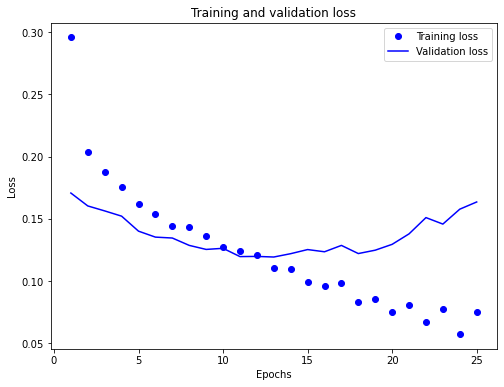

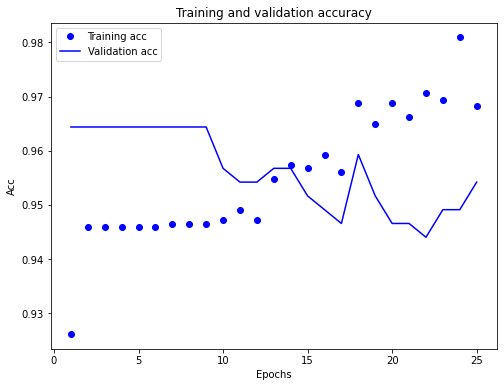

In [105]:
#画图
plt.figure(figsize=(8,6),facecolor='white',edgecolor='white') #设置画布颜色、画布边线颜色
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.figure(figsize=(8,6),facecolor='white',edgecolor='white') #设置画布颜色、画布边线颜色
plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [118]:
df1= pd.DataFrame(y_pred)
df1
df1.to_csv("y.csv")